## Cubic interpolation

### Considering unit interval [0,1]
Let's assume that we want to interpolate the value in between two given points. And we are not interested in linear interpolation, but would like to fit a polynomial of degree 3. 
Let's also assume that we want to interpolate for values $x \in [0,1]$, where f(0) and f(1) are given.
Since we are fitting curved function (a polynomial), we would like to preserve the smoothness on the borders.
I we would consider to fit a polynomial to more than 2 points. We would anyway fit a polynomial for every pair of points. To preserve the smoothness, the Cubic Hermit Spline (the thing, which we will compose below) takes into account the derivative at these two points. So, for fitting the cubic spline, we also assume that f'(0) and f'(1) are given. Either by someone mighty or compute using the finite difference. To compute the numeric derivative using finite distance we need to also know the value of the function outside [0,1].

The general equation for the polynomial of degree 3 is:

$$
    f(x) = ax^3 + bx^2 + cx + d
$$


So to fit f(x) we need to find the coefficients (a,b,c,d). For now we have 4 unknowns (a,b,c,d) and 2 equations (for f(0) and f(1)), which gives us underdefined system of linear equations. (Note: the unknowns are a,b,c and d and they are linear).

To compensate for this problem we take into account the first derivatives in given points f'(0) and f'(1).
 
$$
    f'(x) = 3ax^2 + 2bx + c
$$

Then we can obtain the following system of equations (1):   
\begin{eqnarray}
    f(0)  &=& d \\
    f(1)  &=& a + b + c +d \\
    f'(0) &=& c \\
    f'(1) &=& 3a + 2b + c
\end{eqnarray}

Solving for a, b, c, d:  
\begin{eqnarray}
    d &=& f(0) \\
    c &=& f'(0) \\
    b &=& 3f(1)-2f'(0) - 3f(0) - f'(1) \\
    a &=& -2f(1) + f'(0) + 2f(0) + f'(1)
\end{eqnarray}

Ok, found polynomial coefficients. But how do we know the derivatives given just f(0) and f(1)? This is a point in time where we need two extra points and the knowledge of finite differences :smile:

Let's consider the following example. We are given points $[-1,p_0]$, $[0,p_1]$, $[1,p_2]$ and $[2, p_3]$, where $x,f(x)]$. and we want to interpolate between $[0, p_1]$ and $[1, p_2]$.
Then,  
\begin{eqnarray}
    f(0)  &=& p_1 \\
    f(1)  &=& p_2 \\
    f'(0) &=& (p_2 - p_0) / 1-(-1)  \\
    f'(1) &=& (p_3 - p_1) / 2  \\
\end{eqnarray}

the following holds:
\begin{eqnarray}
    a &=& 0.5 * (3p_1 - p_0 - 3p_2 + p_3) \\
    b &=& p_0 - 2.5p_1 + 2p_2 - 0.5p_3\\
    c &=& 0.5(p_2 - p_0) \\
    d &=& p_1
\end{eqnarray}

The final polynom then is:

\begin{equation}
 f(x) = 0.5 * (3p_1 - p_0 - 3p_2 + p_3) x^3 + (p_0 - 2.5p_1 + 2p_2 - 0.5p_3) x^2 + 0.5(p_2 - p_0) x + p_1 
\end{equation}

**Warning** This only works if your x is between 0 and 1 and all the points are located at distance 1 from each other in x axis.

Polynomial coefficients:  4.0 -6.5 0.5 5


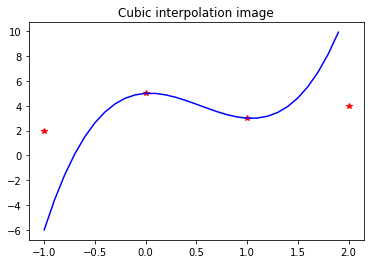

In [13]:
## Code for testing the cubic interpolation
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-1, 0, 1, 2])
fx = np.array([2, 5, 3,4])

a = 0.5 * (3 * fx[1] - fx[0] - 3*fx[2] + fx[3]);
b = fx[0] - 2.5 * fx[1] + 2 * fx[2] - 0.5 * fx[3];
c = 0.5 * (fx[2]- fx[0])
d = fx[1]
print("Polynomial coefficients: ",a,b,c,d)

x_t = np.arange(-1, 2,0.1);
f_x = a* np.power(x_t,3) + b*np.power(x_t,2) + c*x_t + d;

# fig=plt.figure(figsize=(16, 4), dpi= 80, facecolor='w', edgecolor='k')
fig = plt.figure(1)
plt.plot(x,fx, 'r*')
plt.plot(x_t,f_x, 'b-')
plt.title("Cubic interpolation image");

#### Matrix formulation
In the above derivation, we basically solved the system of linear equation with respect to a,b,c,d by explicit substition. In general, we can rewrite this system in matrix notation and solve using technique for solving systems of linear equation using matrices. We can rewrite the Equations (1), as:

$$
\begin{pmatrix}
    0 & 0 & 0 & 1 \\
    1 & 1 & 1 & 1 \\
    0 & 0 & 1 & 0 \\
    3 & 2 & 1 & 0
\end{pmatrix} 
\begin{pmatrix}
a \\ b\\ c \\d 
\end{pmatrix} = 
\begin{pmatrix}
f(0) \\ f(1) \\ f'(0) \\ f'(1)
\end{pmatrix}
$$

Afterwards solving for (a,b,c,d) should give the result. Let's check it with a code.

Checking matrix formulation
Polynomial coefficients:  4.0 -6.5 0.5 5.0


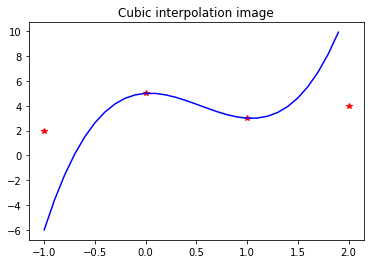

In [14]:
## considering x, fx from previous cell
from numpy import linalg as LA
print("Checking matrix formulation")
F = np.matrix([[0,0,0,1],[1,1,1,1], [0,0,1,0], [3,2,1,0]])
b = np.array([fx[1], fx[2], 0.5 * (fx[2] - fx[0]), 0.5 * (fx[3]-fx[1])])
abcd = np.linalg.solve(F,b)
print("Polynomial coefficients: ",abcd[0], abcd[1], abcd[2], abcd[3])

f_x = abcd[0]* np.power(x_t,3) + abcd[1]*np.power(x_t,2) + abcd[2]*x_t + abcd[3];

# fig=plt.figure(figsize=(16, 4), dpi= 80, facecolor='w', edgecolor='k')
fig = plt.figure(1)
plt.plot(x,fx, 'r*')
plt.plot(x_t,f_x, 'b-')
plt.title("Cubic interpolation image");


The last equation derived above is also confirmed by Wikipedia (https://en.wikipedia.org/wiki/Cubic_Hermite_spline) on the unit interval. If we rearrange, the $f(x)$ with respect to $p_0,p_1, p_2,p_3$ rather than $x$, we get exactly the formula from Wikipedia (Checked!).

**Side note** (for curious)
After the rearrangement the polynomial will have the following form:

$$
    f(x) = (2x^3 - 3x^2 + 1)f(0) + (x^3-2x^2+x)f'(0) + (-2x^3+3x^2)f(1) + (x^3-x^2)f'(1)
$$

The "coeffients" in this case are called Hermite basis functions and have further properties (not relevant here).

$$
    f(x) = h_{00}f(0) + h_{01}f'(0) + h_{10}f(1) + h_{11}f'(1)
$$

### Arbitrary interval

Ok. What if the x coordinates are not 0 and 1? Since, all the nice equations above hold only if we compute f'(0) and f'(1).
I guess, there 2 cases to consider:
    1) Your points are at 1 distance but shifted somewhere. Then the solution would be to shift the result.
    2) The points are not equidistant or the distance is not 1. Then one would need to take distance into account for computing derivatives.

## Bicubic interpolation

[See https://en.wikipedia.org/wiki/Bicubic_interpolation for explicit computation of all terms.]

Analogously to the cubic interpolation, we would like to fit a 3 degree polynomial, but now for the 2D data.
The general equation for the 2D polynomial of 3 order is:

$$
    f(x,y) = \sum_{i=0}^3\sum_{j=0}^3 a_{ij}x^iy^j
$$

Rewritting this by opening the sum will give us $16$ coeffients.

\begin{eqnarray}
    f(x,y) =  a_{00}x^0y^0 + a_{01}x^0y^1 + a_{02}x^0y^2 + a_{03}x^0y^3 + \\
               a_{10}x^1y^0 + a_{11}x^1y^1 + a_{12}x^1y^2 + a_{13}x^1y^3 + \\
               a_{20}x^2y^0 + a_{21}x^2y^1 + a_{22}x^2y^2 + a_{23}x^2y^3 + \\
               a_{30}x^3y^0 + a_{31}x^3y^1 + a_{32}x^3y^2 + a_{33}x^3y^3 + \\            
\end{eqnarray}

As in 1D case, we assume unit square $[0,1] x [0,1]$ and to fit a polynomial, we assume the function value on the boundaries to be given f(0,0), f(0,1), f(1,0), f(1,1). Then, we estimate first 4 equations, by evaluating f(x,y) at the boundaries.
As well as in 1D case to preserve the smoothness on the borders, we also assume to know the partial derivatives $f_{x}(x,y)$, $f_{y}(x,y)$ and mixed partial derivatives $f_{xy}(x,y)$. Evaluating these partial derivatives on the boundaries gives us further 12 equations.

As in matrix formulation for 1D case, we can form a 16x16 matrix of parameters and respective f(.,.) terms and solve the system of linear equations with respect to $a_{ij}$ parameters. See [https://en.wikipedia.org/wiki/Bicubic_interpolation](Bicubic interpolation) for full matrix.

In more favourable matrix form, the coeffients can be found as:

$$
\begin{pmatrix}
    a_{00} & a_{01} & a_{02} & a_{03} \\ 
    a_{10} & a_{11} & a_{12} & a_{13} \\
    a_{20} & a_{21} & a_{22} & a_{23} \\
    a_{30} & a_{31} & a_{32} & a_{33} 
\end{pmatrix} 
=
\begin{pmatrix}
    1 & 0 & 0 & 0 \\ 
    0 & 0 & 1 & 0 \\
    -3 & 3 & -2 & -1 \\
    2 & -2 & 1 & 1 
\end{pmatrix}  
\begin{pmatrix}
    f(0,0) & f(0,1) & f_y(0,0) & f_y(0,1) \\ 
    f(1,0) & f(1,1) & f_y(1,0) & f_y(1,1) \\
    f_x(0,0)& f_x(0,1) & f_{xy}(0,0) & f_{xy}(0,1) \\
    f_x(1,0) & f_x(1,1) & f_{xy}(1,0) & f_{xy}(1,1) 
\end{pmatrix}
\begin{pmatrix}
    1 & 0 & -3 & 2 \\ 
    0 & 0 & 3 & -2 \\
    0 & 1 & -2 & 1 \\
    0 & 0 & -1 & 1 
\end{pmatrix}
$$

The final interpolated value can be obtained as:

$$
 f(x,y) = 
 \begin{pmatrix}
  1 & x & x^2 & x^3
 \end{pmatrix}
 \begin{pmatrix}
    a_{00} & a_{01} & a_{02} & a_{03} \\ 
    a_{10} & a_{11} & a_{12} & a_{13} \\
    a_{20} & a_{21} & a_{22} & a_{23} \\
    a_{30} & a_{31} & a_{32} & a_{33} 
\end{pmatrix} 
\begin{pmatrix}
  1 \\ y \\ y^2 \\ y^3
\end{pmatrix}
$$


## Finding derivatives

To solve the anove specified system, we either need to know all the derivatives beforehand, or we can approximate them using the [finite differences](https://en.wikipedia.org/wiki/Finite_difference).
The partial derivative then can be computed as:

\begin{eqnarray}
    f_x(x,y) &=& 0.5 * (f(x+h, y) - f(x-h,y)) \\
    f_y(x,y) &=& 0.5 * (f(x, y+k) - f(x, y-k)) \\
    f_{xy}(x,y) &=& \frac{f(x+h,y+k) - f(x+h, y-k) - f(x-h,y+k) + f(x-h, y-k)}{4hk}
\end{eqnarray}

For the case of bicubic interpolation, all our values are equidistance with distance 1 (since we work with pixels). So, h and k are equal to 1.
Considering the image patch like in the image
![image](data/bicubic_int.png)
If we want to find the partial derivatives for the point $c_{11}$, they will involve the following pixels:

\begin{eqnarray}
    f_x(x,y) &=& 0.5 * (c_{12} - c_{10}) \\
    f_y(x,y) &=& 0.5 * (c_{21} - c_{01}) \\
    f_{xy}(x,y) &=& \frac{c_{22}- c_{02} - c_{20} + c_{00}}{4}
\end{eqnarray}


In [15]:
def bicubicInterpolation(image, scale):
    orig_rows = image.shape[0];
    orig_cols = image.shape[1];
    img_sc = np.zeros((orig_rows*scale, orig_cols*scale));
#     append 2 columns for each border
    B = np.matrix([[1.0, 0, 0, 0], [0, 0, 1, 0], [-3, 3, -2, -1], [2, -2, 1, 1]])
    C = np.matrix([[1.0, 0, -3, 2], [0, 0, 3, -2], [0, 1, -2, 1], [0, 0, -1, 1]])
    
    for r in range(0, img_sc.shape[0]):
        for c in range (0, img_sc.shape[1]):   
            orig_row = int(np.floor(r/scale))
            orig_col = int(np.floor(c/scale))
            patch = np.zeros((4,4));
            ## make a patch to avoid border conditions check
            pr = 0;
            pc = 0;
            for y in range(orig_row-1, orig_row + 3):
                for x in range(orig_col - 1, orig_col +3):
                    x = max(0, x);
                    x = min(x, orig_cols - 1);
                    y = max(0, y);
                    y = min(y, orig_rows - 1)
                    patch[pr,pc] = image[y,x]
                    pc += 1;
                pr += 1;
                pc = 0;
            
            F = np.zeros((4,4));
            ## where to find f values in a constructed patch
            f00 = [1,1];
            f01 = [1,2];
            f10 = [2,1];
            f11 = [2,2];
            
            F[0,0] = patch[f00[0], f00[1]];
            F[0,1] = patch[f01[0], f01[1]];
            F[1,0] = patch[f10[0], f10[1]];
            F[1,1] = patch[f11[0], f11[1]];
            ## y derivatives
            F[0,2] = 0.5 * (patch[f00[0], f00[1] + 1] - patch[f00[0], f00[1] - 1])
            F[0,3] = 0.5 * (patch[f01[0], f01[1] + 1] - patch[f01[0], f01[1] - 1])
            F[1,2] = 0.5 * (patch[f10[0], f10[1] + 1] - patch[f10[0], f10[1] - 1])
            F[1,3] = 0.5 * (patch[f11[0], f11[1] + 1] - patch[f11[0], f11[1] - 1])
            ## x derivatives
            F[2,0] = 0.5 * (patch[f00[0] +1, f00[1]] - patch[f00[0] -1, f00[1]])
            F[2,1] = 0.5 * (patch[f01[0] +1, f01[1]] - patch[f01[0] -1, f01[1]])
            F[3,0] = 0.5 * (patch[f10[0] +1, f10[1]] - patch[f10[0] -1, f10[1]])
            F[3,1] = 0.5 * (patch[f11[0] +1, f11[1]] - patch[f11[0] -1, f11[1]])
            # mixed derivatives
            F[2,2] = 0.25* (patch[f00[0]+1, f00[1]+1] - patch[f00[0]+1, f00[1]-1] - 
                            patch[f00[0]-1, f00[1]+1] + patch[f00[0]-1, f00[1]-1])
            F[2,3] = 0.25* (patch[f01[0]+1, f01[1]+1] - patch[f01[0]+1, f01[1]-1] - 
                            patch[f01[0]-1, f01[1]+1] + patch[f01[0]-1, f01[1]-1])
            F[3,2] = 0.25* (patch[f10[0]+1, f10[1]+1] - patch[f10[0]+1, f10[1]-1] - 
                            patch[f10[0]-1, f10[1]+1] + patch[f10[0]-1, f10[1]-1])
            F[3,3] = 0.25* (patch[f11[0]+1, f11[1]+1] - patch[f11[0]+1, f11[1]-1] - 
                            patch[f11[0]-1, f11[1]+1] + patch[f11[0]-1, f11[1]-1])
            A = B.dot(F).dot(C);
            dx = c/scale - np.floor(c/scale);
            dy = r/scale - np.floor(r/scale);
            Y = np.matrix([[1, dy, np.power(dy,2), np.power(dy,3)]])
            X = np.matrix([[1], [dx], [np.power(dx,2)], [np.power(dx,3)]])
            img_sc[r,c] = Y*A*X;
            
    return img_sc;
    

In [16]:
## testing the interpolation
m = np.matrix([[10,0], [0,0]]);
scale = 2;
print(m)
img_sc= bicubicInterpolation(m, scale);
print(img_sc)

[[10  0]
 [ 0  0]]
[[10.         5.         0.        -0.625    ]
 [ 5.         2.5        0.        -0.3125   ]
 [ 0.         0.         0.         0.       ]
 [-0.625     -0.3125     0.         0.0390625]]


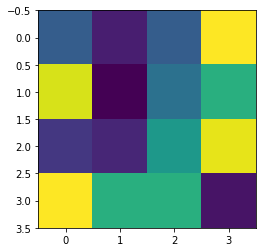

In [19]:
import cv2
import matplotlib.pyplot as plt
img_name = 'data/tiny_img.png';
image = cv2.imread(img_name, 0);
image = image.astype('float')
# new_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = image.astype('float')
plt.imshow(image);

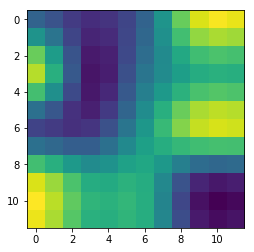

In [32]:
img_sc= bicubicInterpolation(image, 3);
plt.imshow(img_sc);

# Comparison between image interpolations
Now I want to see the difference between the nearest neighbour, bilinear and cubic interpolation.

### Nearest neighbour interpolation

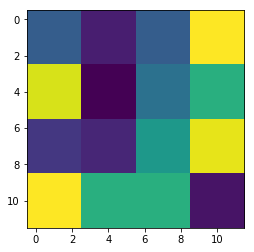

In [30]:
def nnInterpolation(image, scale):
    orig_rows = image.shape[0];
    orig_cols = image.shape[1];
    img_sc = np.zeros((orig_rows*scale, orig_cols*scale));
    for r in range(0,img_sc.shape[0]):
        for c in range(0, img_sc.shape[1]):
            orig_pix_r = int(np.floor(r/scale));
            orig_pix_c = int(np.floor(c/scale));
            img_sc[r,c] = image[orig_pix_r, orig_pix_c];
    return img_sc
img_sc= nnInterpolation(image, 3);
plt.imshow(img_sc);

### Bilinear interpolation


In [ ]:
def bilinearInterpolation(image, scale):
    orig_rows = image.shape[0];
    orig_cols = image.shape[1];
    img_sc = np.zeros((orig_rows*scale, orig_cols*scale));
    
    for r=1:new_size(1),
        for c = 1:new_size(2)
            orig_pix_r = int(np.floor(r/scale));
            orig_pix_c = int(np.floor(c/scale));

            ## establishing neighboring pixels coordinates
            p_row_up = max(0, floor(p(1)));
            p_row_down = min(orig_size(1) - 1, ceil(p(1)));
            p_col_left = max(0, floor(p(2)));
            p_col_right = min(orig_size(2) - 1, ceil(p(2)));
            a00 = double(img(p_row_up + 1, p_col_left + 1,:));
            a01 = double(img(p_row_up + 1, p_col_right + 1,:));
            a10 = double(img(p_row_down + 1, p_col_left + 1,:));
            a11 = double(img(p_row_down + 1, p_col_right + 1,:));
            dx = p(1) - p_row_up;
            dy = p(2) - p_col_left;
            img_sc(r,c,:) = a00.* (1.- dx) * (1. - dy) ... 
                            + a01.* (1.- dx) * dy ...
                            + a10.* dx * (1.- dy) ...
                            + a11.* dx * dy;
        end
    end
end